# Shopping Trends Analysis  
This notebook explores customer shopping patterns, including demographics, gender distribution, and most purchased items.


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sqlalchemy import create_engine


user = "root"
password = ""     
host = "localhost"
port = 3306
database = "csv_db 10" 

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

df = pd.read_sql("SELECT * FROM shopping_trends", engine)

display(df.head()) 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [11]:
df = df.drop_duplicates()

In [12]:
df["Customer ID"].nunique()

3900

In [13]:
df.drop('Customer ID', axis=1, inplace=True)

In [14]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


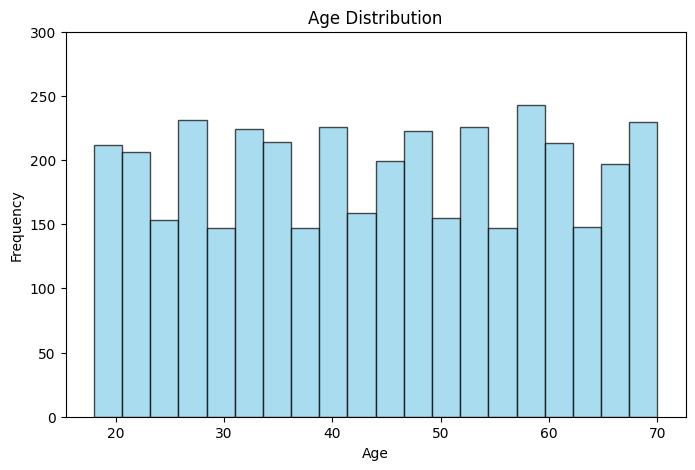

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color="skyblue", edgecolor="black", alpha=0.7)

# Add labels & title
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.ylim(0, 300)

plt.show()

<h2>What is the average age of customers in the dataset ?</h2>

In [16]:
age_avg = df['Age'].mean()
print(f'Average of age is {age_avg}')

Average of age is 44.06846153846154


In [17]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      2652
Female    1248
Name: count, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

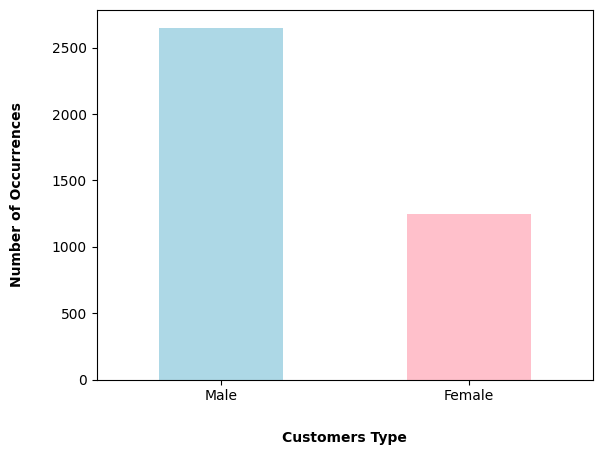

In [18]:
gender_counts.plot(kind = 'bar', color = ["lightblue", "pink"], rot = 0)
plt.xlabel('Customers Type', weight = "bold", labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", labelpad = 20)

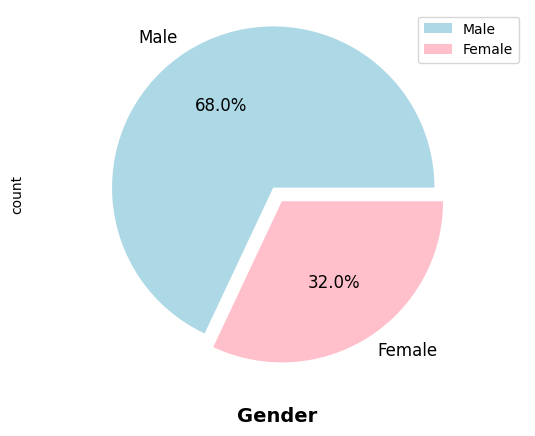

In [19]:
gender_counts.plot(kind = 'pie', fontsize = 12, explode=(0, 0.1), colors =["lightblue", "pink"] , autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = gender_counts.index, loc = "best")
plt.show()

In [20]:
item_purchased_count = df['Item Purchased'].value_counts()
item_purchased_count

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

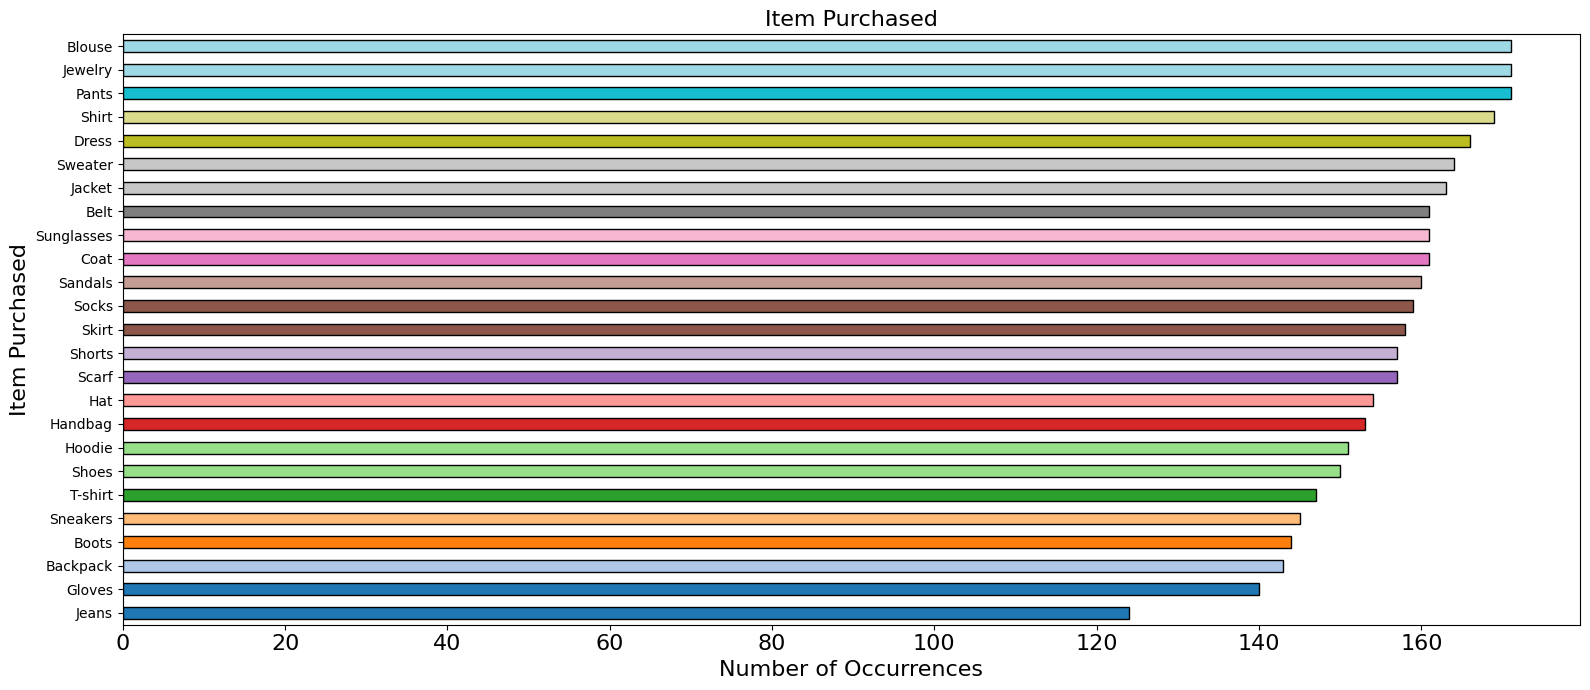

In [21]:
colors = plt.cm.tab20(np.linspace(0, 1, len(item_purchased_count)))
plt.figure(figsize = (16, 7))
item_purchased_count.sort_values(ascending = True).plot(kind = 'barh', color = colors, edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize = 16)
plt.title('Item Purchased', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

<h2>Top 3 Items purchased 

In [22]:
print("Top 3 Items purchased are:")
for item, count in item_purchased_count.items():
    if count == 171:
        print(f"{item}")

Top 3 Items purchased are:
Blouse
Jewelry
Pants


In [23]:
category_counts = df["Category"].value_counts()
category_counts

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

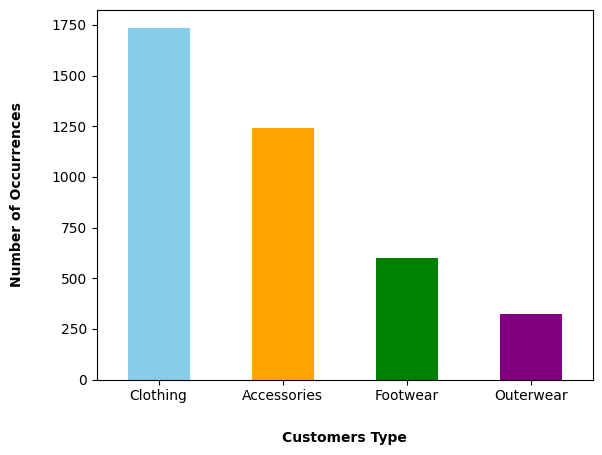

In [24]:
category_colors = ["skyblue", "orange", "green", "purple"]
category_counts.plot(kind = 'bar', color = category_colors, rot = 0)
plt.xlabel('Customers Type', weight = "bold", labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", labelpad = 20)

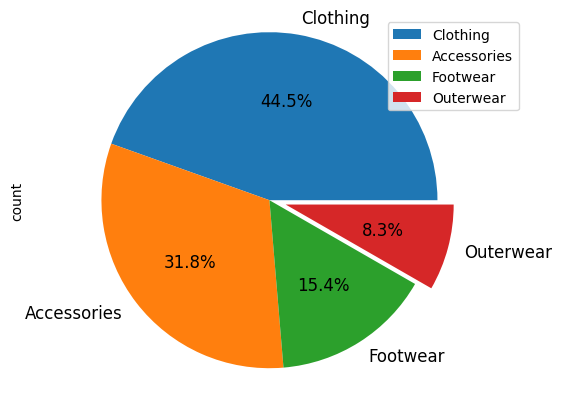

In [25]:
category_counts.plot(kind='pie', fontsize=12, explode=(0,0,0,0.1), color=category_colors, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels = category_counts.index, loc = "best")
plt.show()

In [26]:
df['Purchase Amount (USD)'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

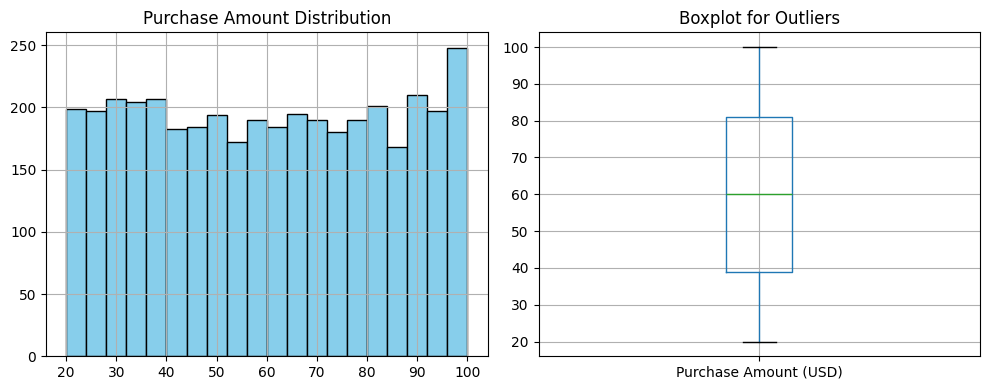

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Purchase Amount (USD)'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Purchase Amount Distribution")

plt.subplot(1,2,2)
df.boxplot(column='Purchase Amount (USD)')
plt.title("Boxplot for Outliers")

plt.tight_layout()
plt.show()

<h2> Low Spenders (less than 40)

In [28]:
low_spenders = df[df["Purchase Amount (USD)"] <= 40]
len(low_spenders)

1060

<h2> Med Spenders (from 40 to 80)

In [29]:
med_spenders = df[(df["Purchase Amount (USD)"] > 40) & (df["Purchase Amount (USD)"] < 80)]
len(med_spenders)

1816

<h2> High Spenders (less than 40)

In [30]:
high_spenders = df[df["Purchase Amount (USD)"] >= 80]
len(high_spenders)

1024

In [31]:
df['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

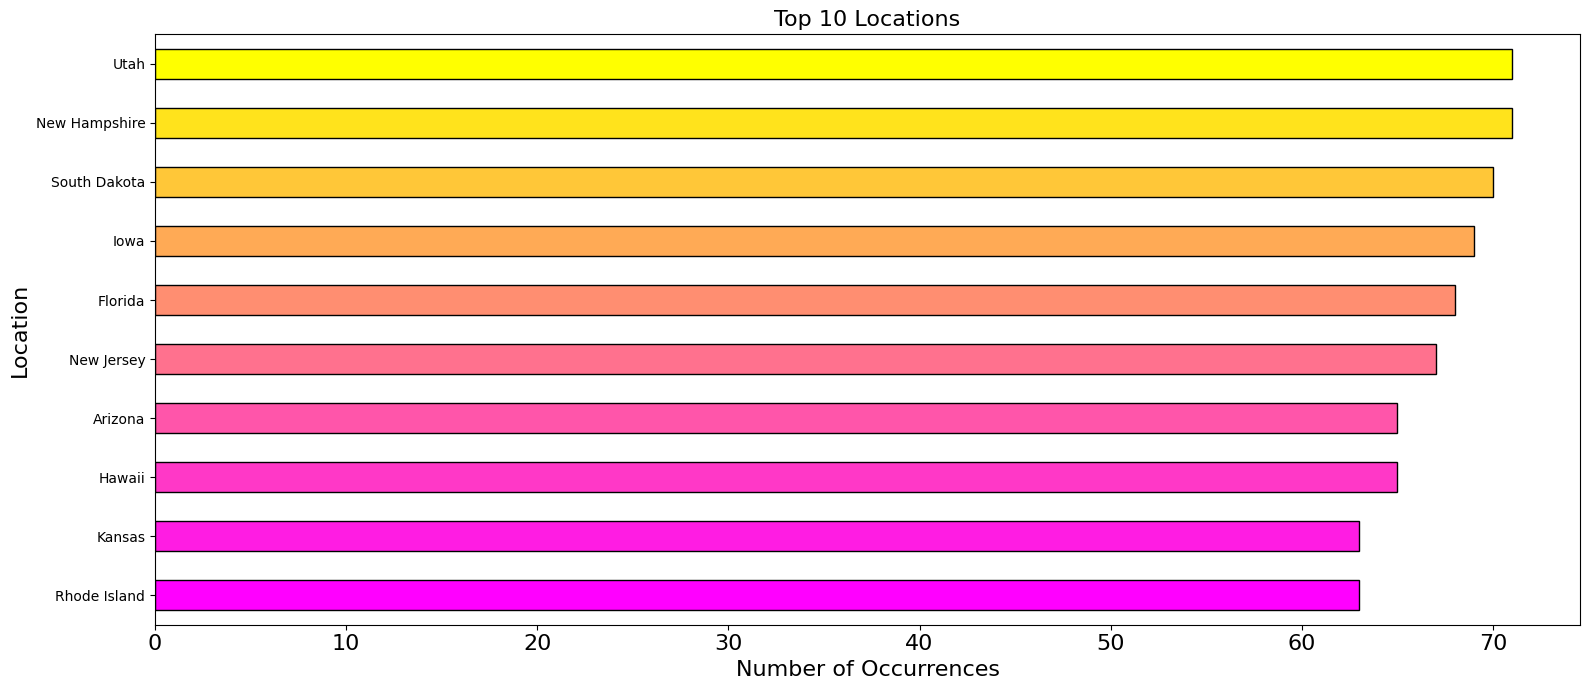

In [32]:
colors = plt.cm.spring(np.linspace(0, 1, 10))
plt.figure(figsize = (16, 7))
df['Location'].value_counts().sort_values(ascending = True)[:10].plot(kind = 'barh', color = colors, edgecolor = 'black')
plt.ylabel('Location', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize = 16)
plt.title('Top 10 Locations', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [33]:
size_count = df["Size"].value_counts()
size_count

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

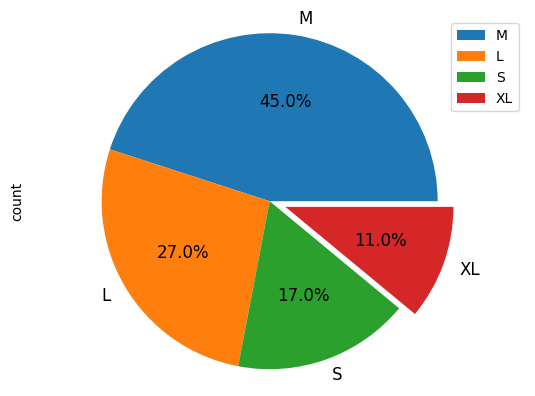

In [34]:
size_count.plot(kind='pie', fontsize=12, explode=(0,0,0,0.1), color=category_colors, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels = size_count.index, loc = "best")
plt.show()

In [35]:
color_count = df['Color'].value_counts()
color_count

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

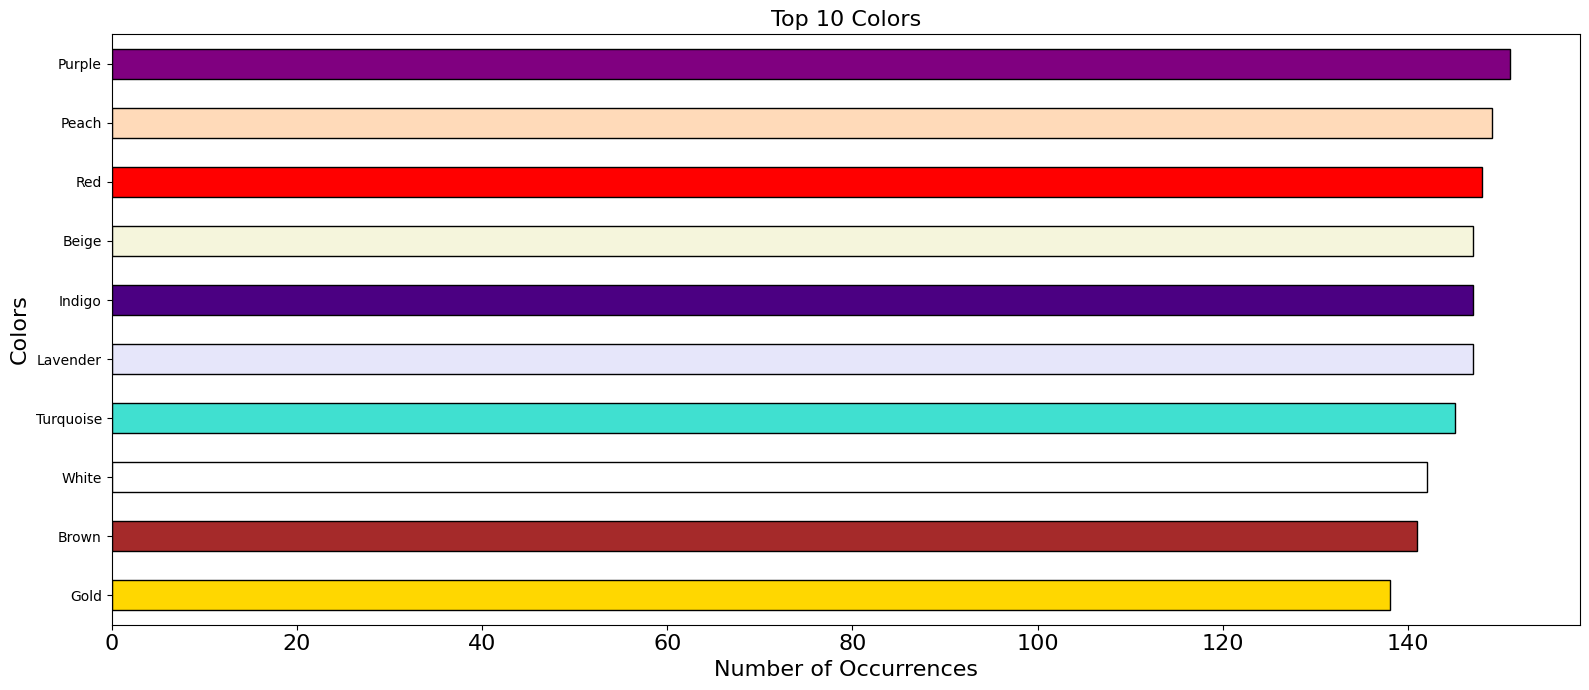

In [36]:
colors = [
    "gold",
    "brown",
    "white",
    "turquoise",
    "lavender",
    "indigo",
    "beige",
    "red",
    "peachpuff",
    "purple"
]
plt.figure(figsize = (16, 7))
color_count.sort_values(ascending = True)[:10].plot(kind = 'barh', color = colors, edgecolor = 'black')
plt.ylabel('Colors', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize = 16)
plt.title('Top 10 Colors', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [37]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

<h2> Most Frequent Shopping Season

In [38]:
df["Season"].mode()[0]
print(f"Most Frequent Shopping Season is {df["Season"].mode()[0]}")

Most Frequent Shopping Season is Spring


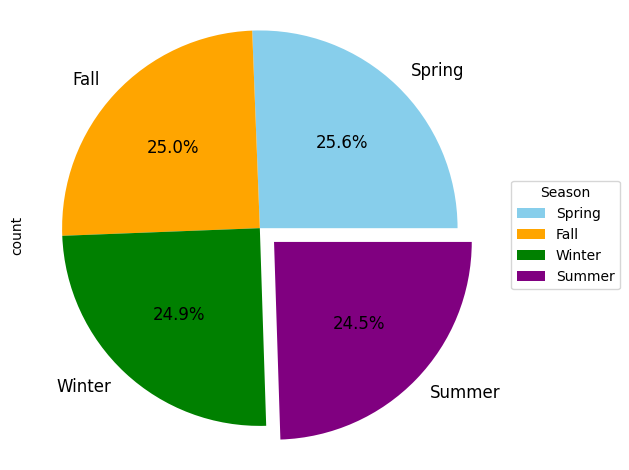

In [39]:
df["Season"].value_counts().plot(
    kind='pie',
    fontsize=12,
    explode=(0, 0, 0, 0.1),
    colors=category_colors,
    autopct='%1.1f%%'
)

plt.axis('equal')

plt.legend(
    labels=df["Season"].value_counts().index,
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    title="Season"
)

plt.tight_layout()
plt.show()


In [40]:
df["Review Rating"].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

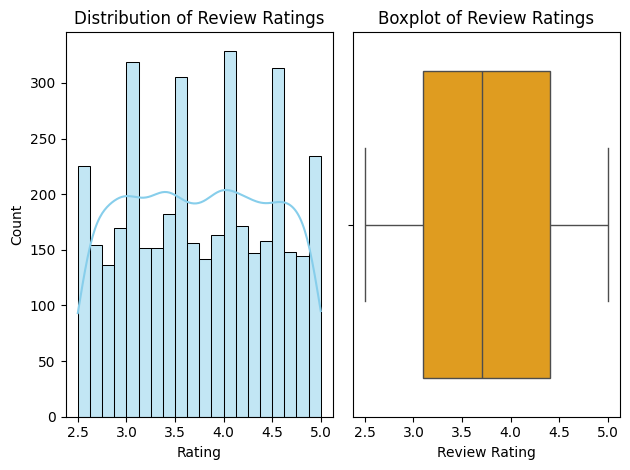

In [41]:
import seaborn as sns
plt.subplot(1, 2, 1)
sns.histplot(df["Review Rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Review Rating"], color="orange")
plt.title("Boxplot of Review Ratings")

plt.tight_layout()
plt.show()

In [42]:
subs_count = df["Subscription Status"].value_counts()
subs_count

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

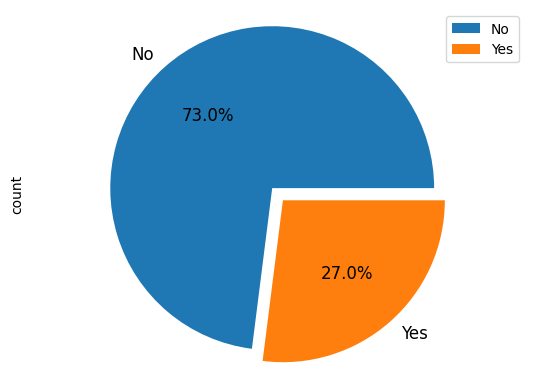

In [43]:
subs_count.plot(kind='pie', fontsize=12, explode=(0,0.1), color=category_colors, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels = subs_count.index, loc = "best")
plt.show()

In [44]:
payment_method = df["Payment Method"].value_counts()
payment_method

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

<h2> Most Frequently Used Payment Method

In [45]:
common_payment_method = df["Payment Method"].mode()[0]
print(f"Most Frequently Used Payment Method is '{common_payment_method}'")

Most Frequently Used Payment Method is 'Credit Card'


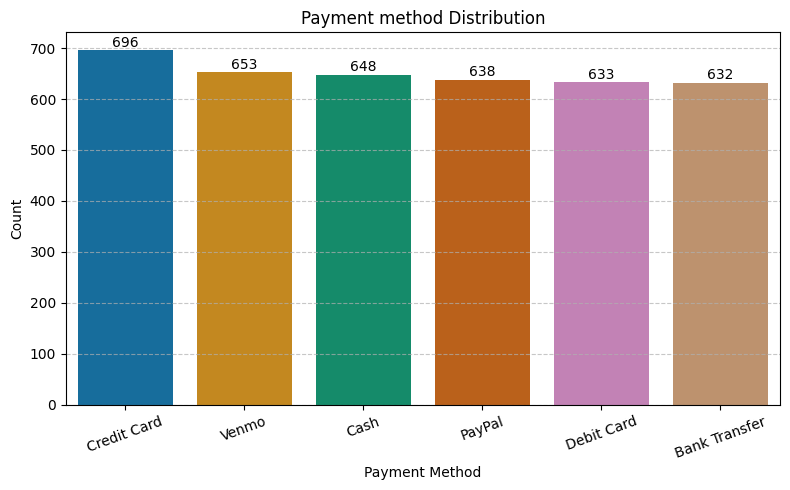

In [46]:
plt.figure(figsize=(8,5))
ax =sns.countplot(
    data=df,
    x="Payment Method",
    order=df["Payment Method"].value_counts().index,
    palette="colorblind"
)
plt.title("Payment method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,                     
        f'{int(height)}',                  
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [47]:
shipping_type = df["Shipping Type"].value_counts()
shipping_type

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

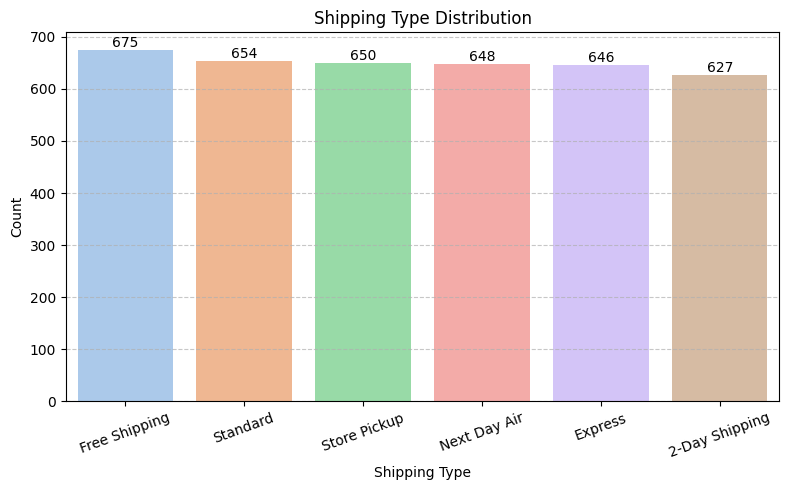

In [48]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=df,
    x="Shipping Type",
    order=df["Shipping Type"].value_counts().index,
    palette="pastel"
)
plt.title("Shipping Type Distribution")
plt.xlabel("Shipping Type")
plt.ylabel("Count")

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,                     
        f'{int(height)}',                  
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [49]:
discount_applied = df["Discount Applied"].value_counts()
discount_applied

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

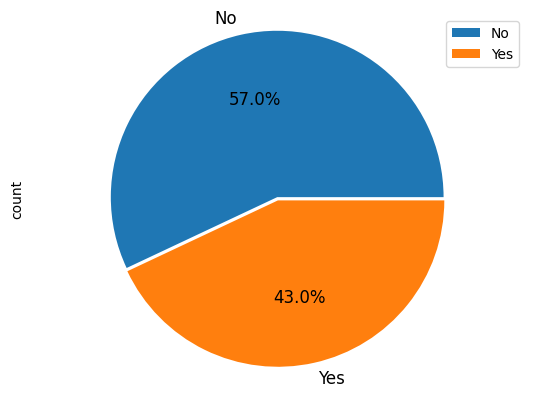

In [50]:
discount_applied.plot(kind='pie', fontsize=12, explode=(0,0.02), color=category_colors, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels = discount_applied.index, loc = "best")
plt.show()

In [51]:
df["Promo Code Used"].value_counts()

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

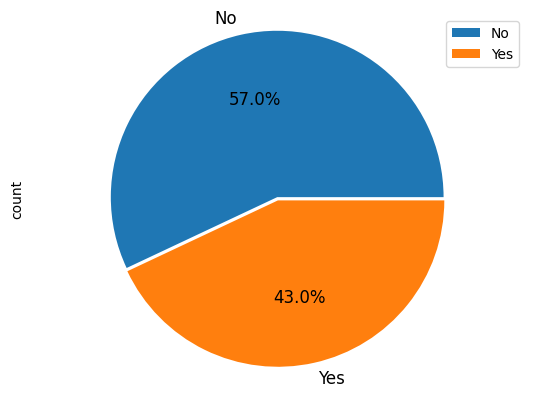

In [52]:
df["Promo Code Used"].value_counts().plot(kind='pie', fontsize=12, explode=(0,0.02), color=category_colors, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels = df["Promo Code Used"].value_counts().index, loc = "best")
plt.show()

In [53]:
df["Previous Purchases"].describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64

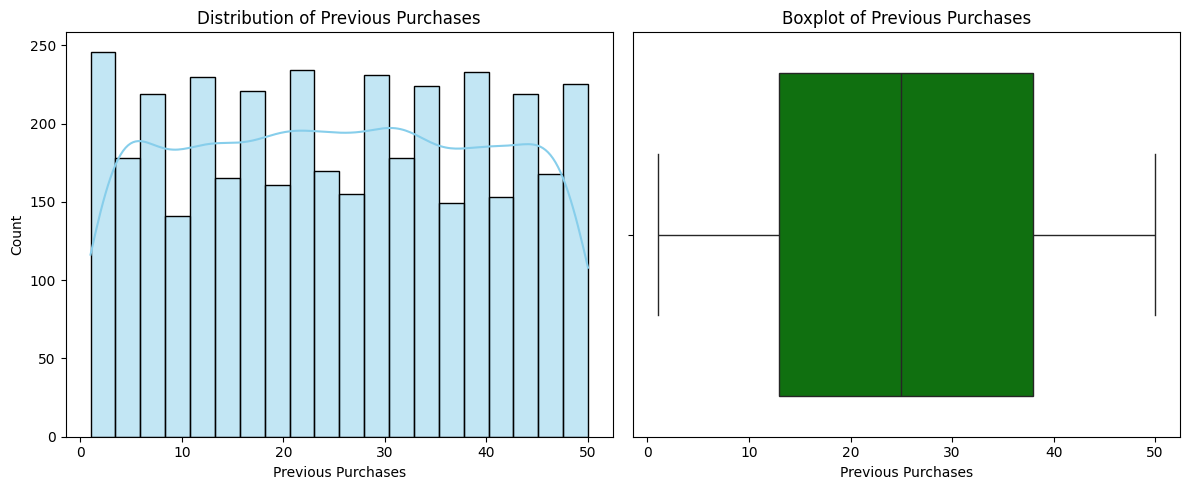

In [54]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Previous Purchases"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.boxplot(x=df["Previous Purchases"], color="green")
plt.title("Boxplot of Previous Purchases")

plt.tight_layout()
plt.show()

In [55]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

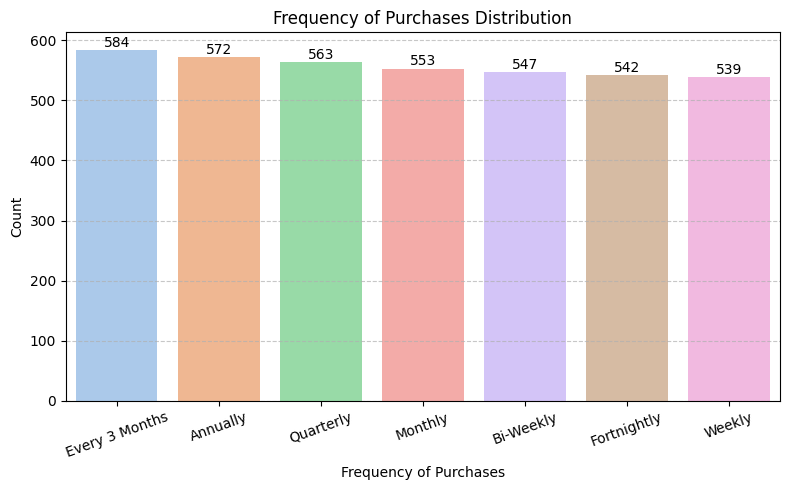

In [56]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=df,
    x="Frequency of Purchases",
    order=df["Frequency of Purchases"].value_counts().index,
    palette="pastel"
)
plt.title("Frequency of Purchases Distribution")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,                     
        f'{int(height)}',                  
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

<h2>Total Purchase by gender

In [57]:
total_purchase_by_gender = df.groupby("Gender")["Purchase Amount (USD)"].sum()
total_purchase_by_gender

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

Text(0, 0.5, 'Total Purchase')

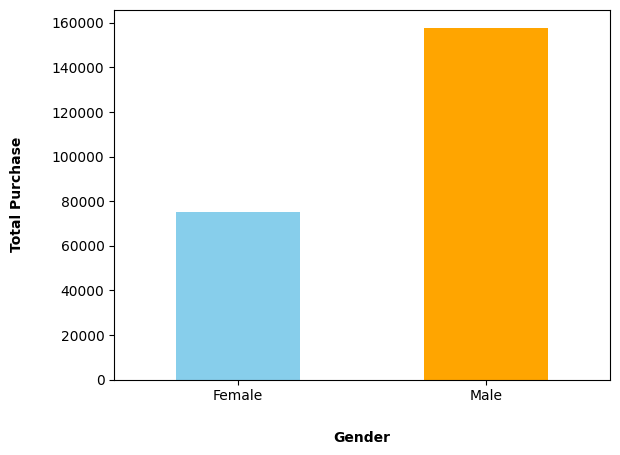

In [58]:
total_purchase_by_gender.plot(kind = 'bar', color = category_colors, rot = 0)
plt.xlabel('Gender', weight = "bold", labelpad = 20)
plt.ylabel('Total Purchase', weight = "bold", labelpad = 20)

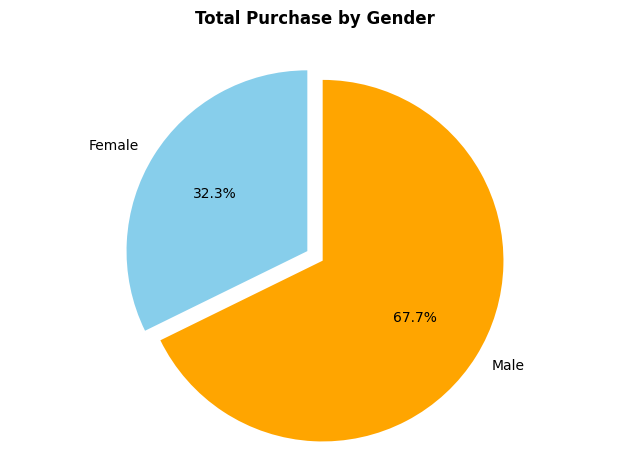

In [59]:
total_purchase_by_gender.plot(
    kind='pie',
    colors=category_colors, 
    autopct='%1.1f%%',        
    startangle=90,            
    ylabel='',                 
    explode=(0, 0.1)
)

plt.title('Total Purchase by Gender', weight="bold", pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

<h2>Total Purchase by Category

In [60]:
total_purchase_by_categories = df.groupby("Category")["Purchase Amount (USD)"].sum()
total_purchase_by_categories

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

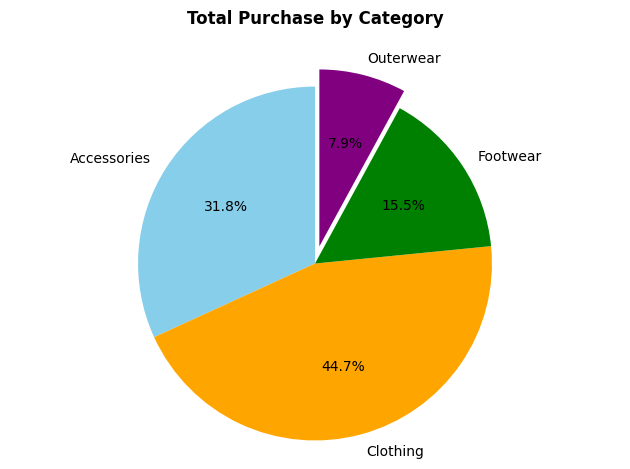

In [61]:
total_purchase_by_categories.plot(
    kind='pie',
    colors=category_colors, 
    autopct='%1.1f%%',        
    startangle=90,            
    ylabel='',                 
    explode=(0, 0, 0, 0.1)
)

plt.title('Total Purchase by Category', weight="bold", pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

<h2> Averafe Purchase by Location

In [62]:
avg_purchase_by_location = df.groupby("Location")["Purchase Amount (USD)"].mean()
avg_purchase_by_location

Location
Alabama           59.112360
Alaska            67.597222
Arizona           66.553846
Arkansas          61.113924
California        59.000000
Colorado          56.293333
Connecticut       54.179487
Delaware          55.325581
Florida           55.852941
Georgia           58.797468
Hawaii            57.723077
Idaho             60.075269
Illinois          61.054348
Indiana           58.924051
Iowa              60.884058
Kansas            54.555556
Kentucky          55.721519
Louisiana         57.714286
Maine             56.987013
Maryland          55.755814
Massachusetts     60.888889
Michigan          62.095890
Minnesota         56.556818
Mississippi       61.037500
Missouri          57.913580
Montana           60.250000
Nebraska          59.448276
Nevada            63.379310
New Hampshire     59.422535
New Jersey        56.746269
New Mexico        61.901235
New York          60.425287
North Carolina    60.794872
North Dakota      62.891566
Ohio              60.376623
Oklahoma   

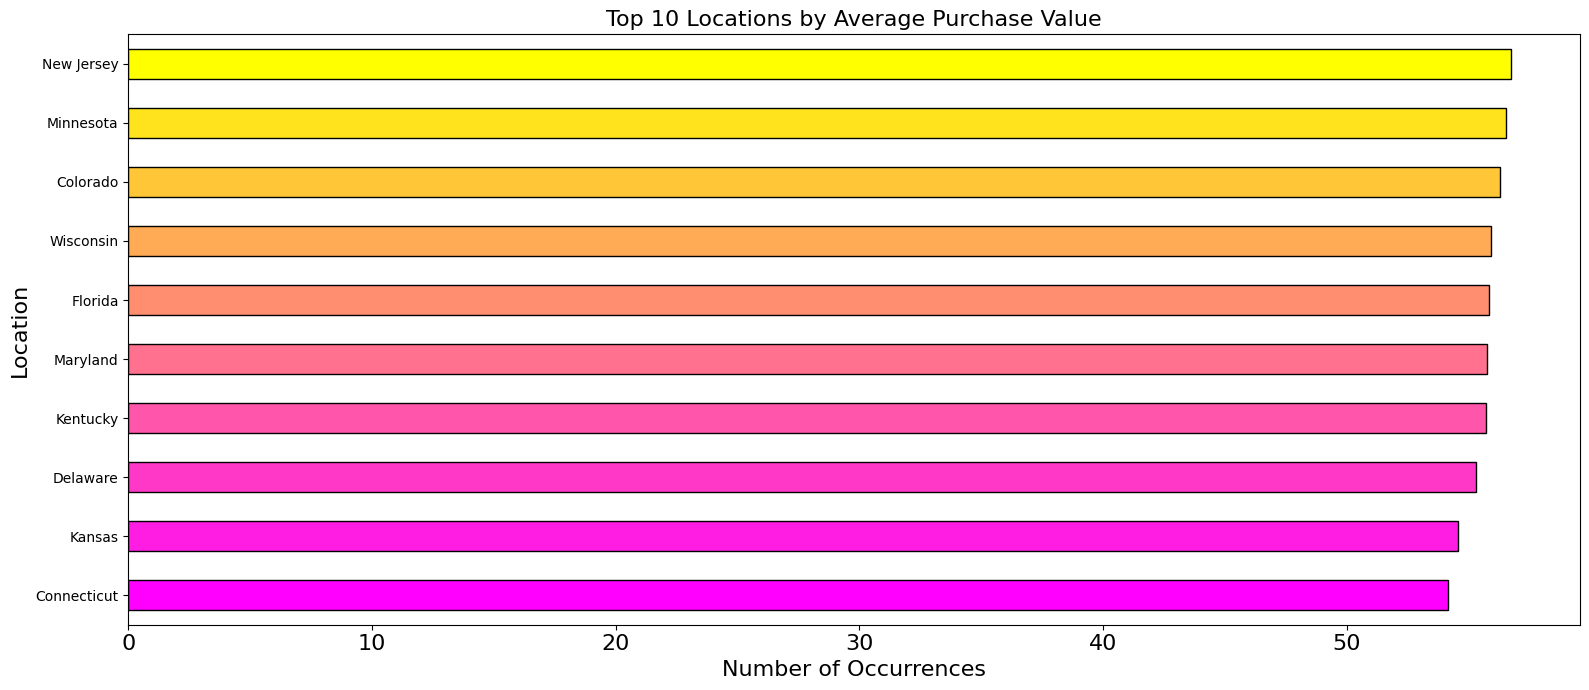

In [63]:
colors = plt.cm.spring(np.linspace(0, 1, 10))
plt.figure(figsize = (16, 7))
avg_purchase_by_location.sort_values(ascending = True)[:10].plot(kind = 'barh', color = colors, edgecolor = 'black')
plt.ylabel('Location', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize = 16)
plt.title('Top 10 Locations by Average Purchase Value', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [64]:
rating_by_gender = df.groupby("Gender")["Review Rating"].mean()
rating_by_gender

Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: float64

In [65]:
for item, count in rating_by_gender.items():
    print(f" the average review rating be {item} is {count}")

 the average review rating be Female is 3.741426282051282
 the average review rating be Male is 3.7539592760180995


In [66]:
df.groupby("Season")["Purchase Amount (USD)"].mean()

Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase Amount (USD), dtype: float64

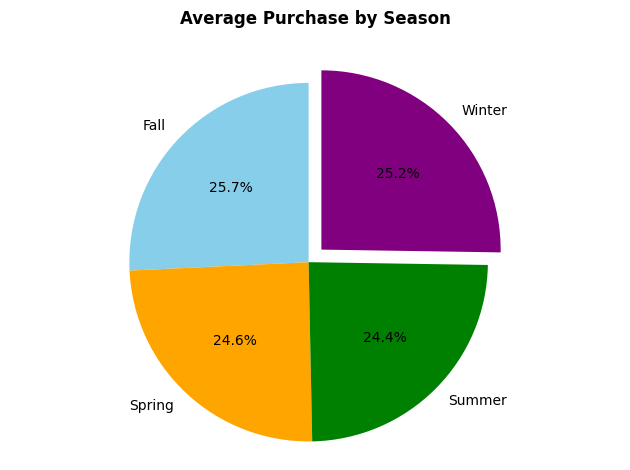

In [67]:
df.groupby("Season")["Purchase Amount (USD)"].mean().plot(
    kind='pie',
    colors=category_colors, 
    autopct='%1.1f%%',        
    startangle=90,            
    ylabel='',                 
    explode=(0, 0, 0, 0.1)
)

plt.title('Average Purchase by Season', weight="bold", pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

<h2> Purchase amount by Age Groups

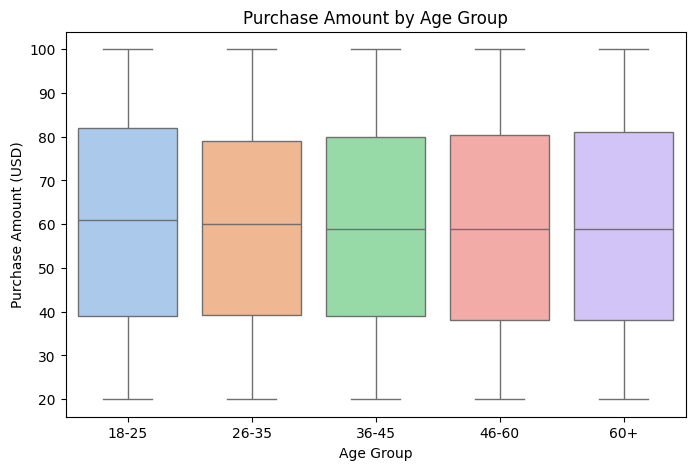

In [68]:
df["Age Group"] = pd.cut(df["Age"], bins=[18,25,35,45,60,80], labels=["18-25","26-35","36-45","46-60","60+"])

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Age Group", y="Purchase Amount (USD)", palette="pastel")
plt.title("Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount (USD)")
plt.show()


In [69]:
freq_mean = df.groupby("Frequency of Purchases")["Previous Purchases"].mean()
freq_mean

Frequency of Purchases
Annually          24.561189
Bi-Weekly         24.787934
Every 3 Months    24.960616
Fortnightly       25.271218
Monthly           25.278481
Quarterly         26.854352
Weekly            25.771800
Name: Previous Purchases, dtype: float64

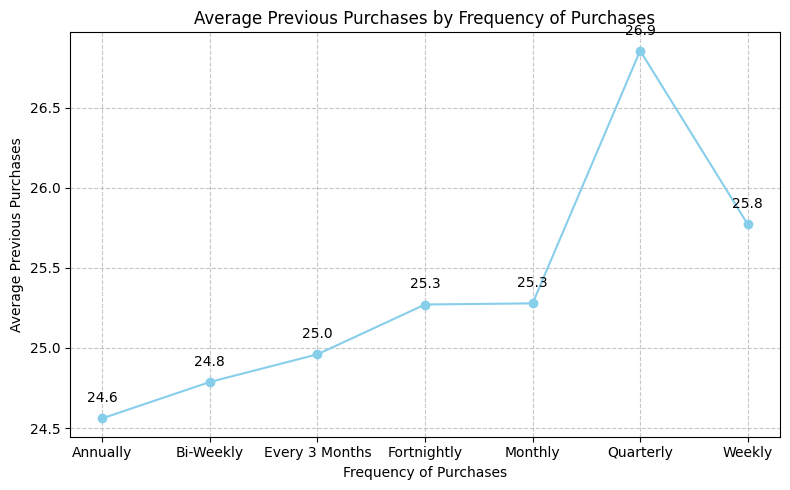

In [70]:
plt.figure(figsize=(8,5))
plt.plot(freq_mean.index, freq_mean.values, marker='o', linestyle='-', color='skyblue')

plt.title("Average Previous Purchases by Frequency of Purchases")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Average Previous Purchases")
plt.grid(True, linestyle='--', alpha=0.7)

for i, v in enumerate(freq_mean.values):
    plt.text(i, v + 0.1, f"{v:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()